# <center> Clustering

### <center> Unsupervised learning with K-means and Hierarchical clustering

<center><img src="superVSunsuper.png">

<center><img src='unsupervised.jpg'>

## <center> K-Means Clustering

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_features=2, n_samples=10, centers=1, random_state=4)

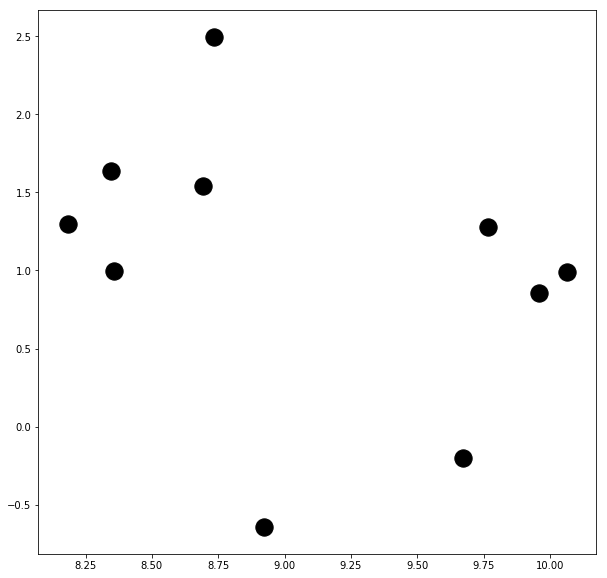

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c='black')

In [3]:
from sklearn.cluster import KMeans

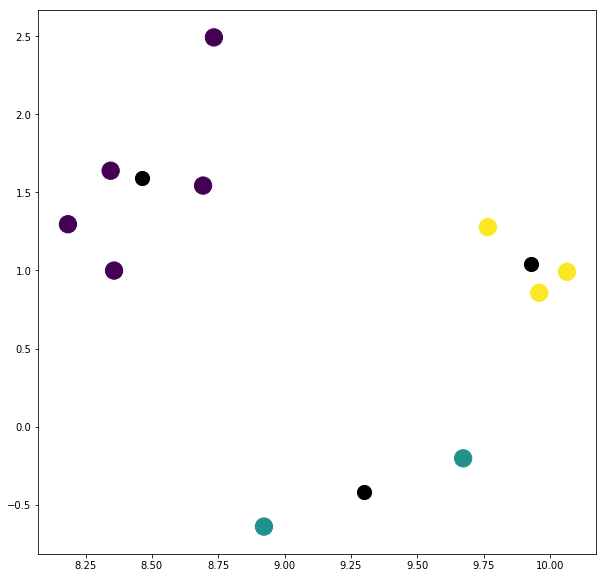

In [4]:
k_cluster = KMeans(n_clusters=3).fit(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c=k_cluster.predict(X))
for i in k_cluster.cluster_centers_:
    plt.scatter(i[0],i[1],s=200, c='black')

In [5]:
k_cluster.predict(X)

array([1, 0, 2, 0, 2, 1, 0, 2, 0, 0], dtype=int32)

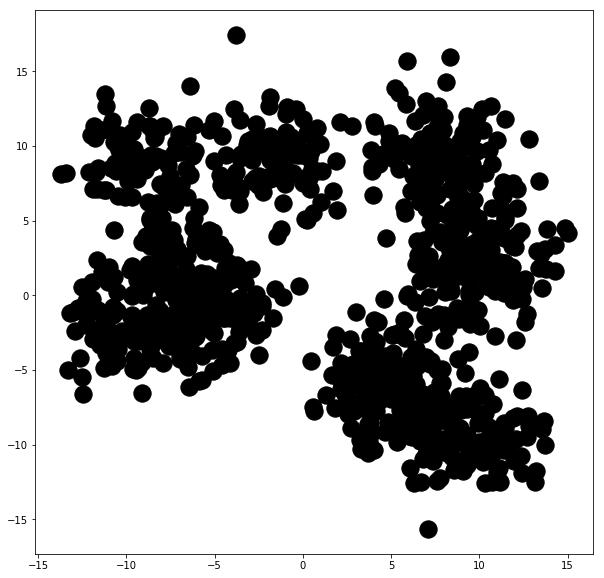

In [6]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=11, random_state=4, cluster_std=2)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c='black')

## <center> Elbow Method
<center> Finding the best value of K

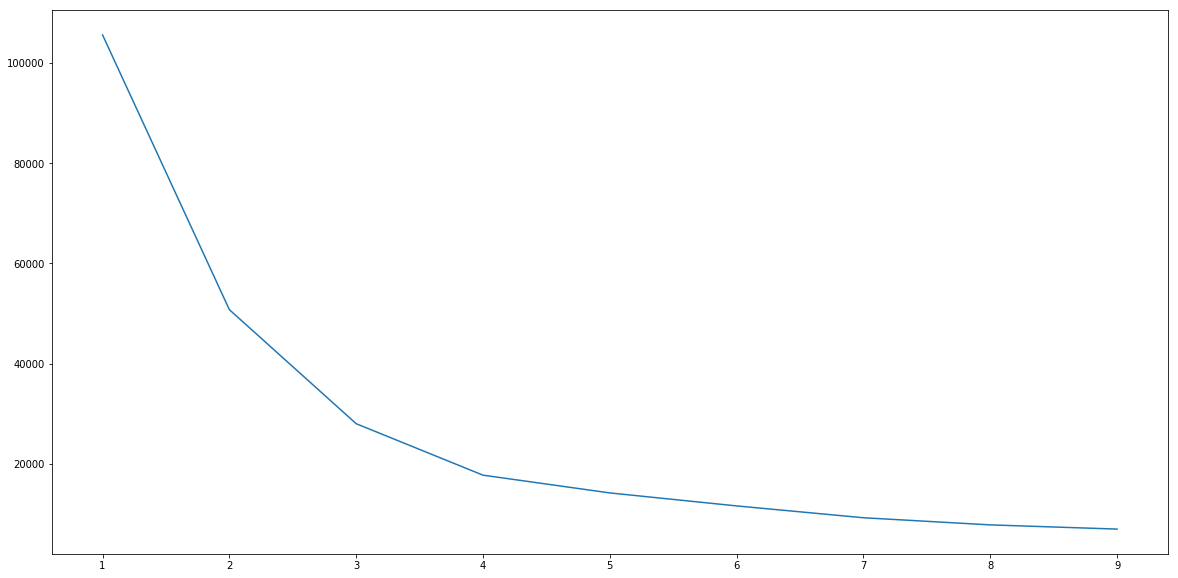

In [7]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,10)], [KMeans(n_clusters=k).fit(X).inertia_ for k in range(1,10)])

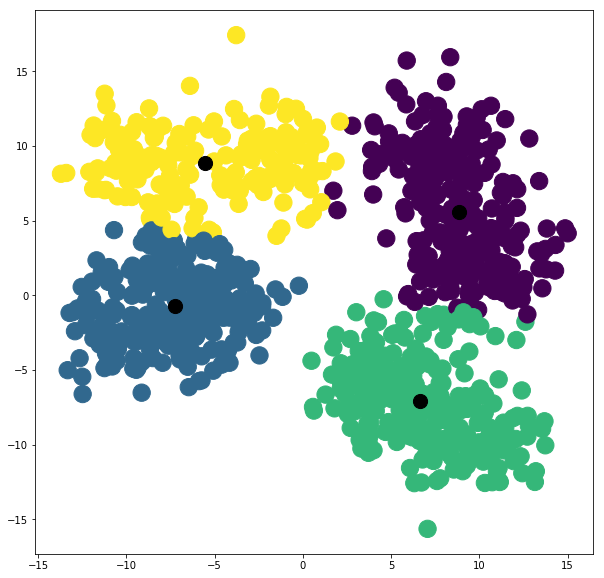

In [8]:
k_cluster = KMeans(n_clusters=4).fit(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c=k_cluster.predict(X))
for i in k_cluster.cluster_centers_:
    plt.scatter(i[0],i[1],s=200, c='black')

## <center> Hierarchical Clustering

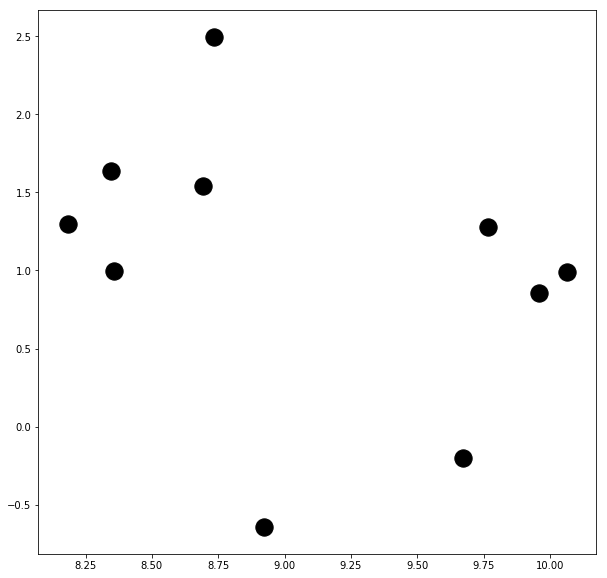

In [9]:
X,y = make_blobs(n_features=2, n_samples=10, centers=1, random_state=4)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c='black')

In [10]:
from sklearn.cluster import AgglomerativeClustering

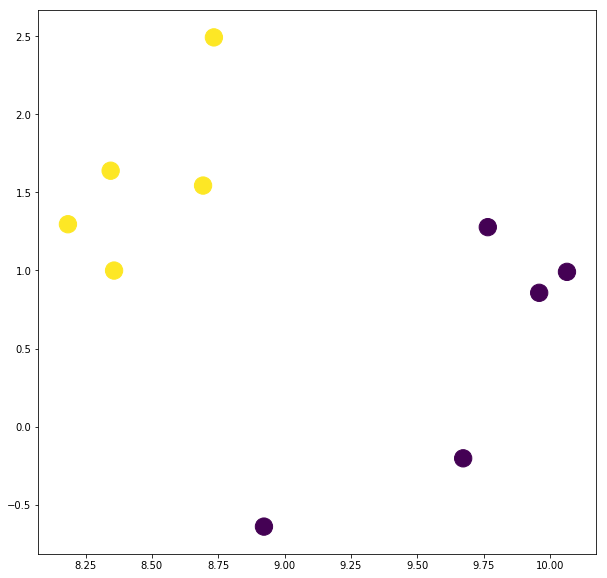

In [11]:
hier_cluster = AgglomerativeClustering().fit(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c=hier_cluster.labels_)

In [12]:
hier_cluster.labels_

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

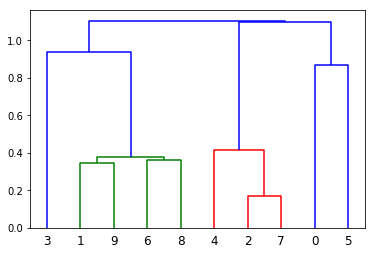

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)  
plt.show()

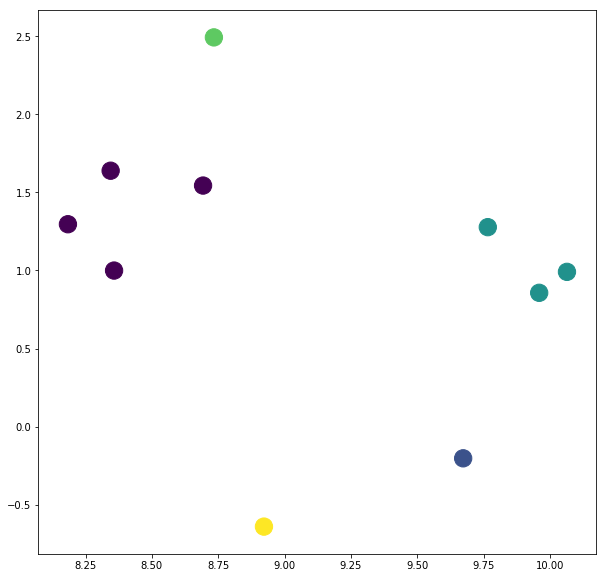

In [14]:
hier_cluster = AgglomerativeClustering(n_clusters=5).fit(X)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c=hier_cluster.labels_)

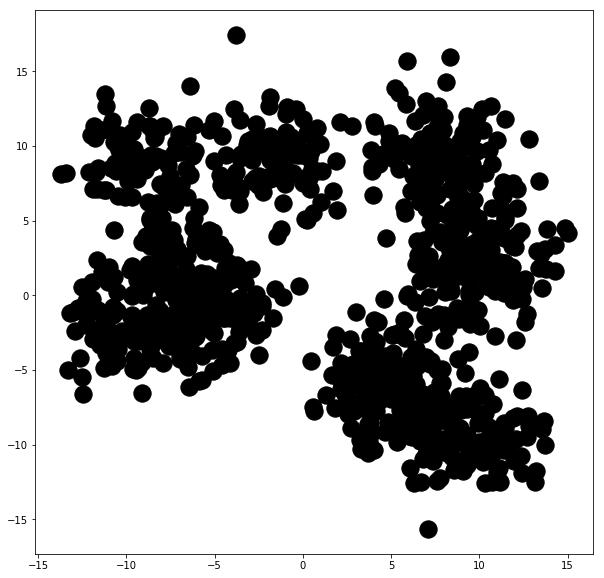

In [15]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=11, random_state=4, cluster_std=2)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],s=300, c='black')

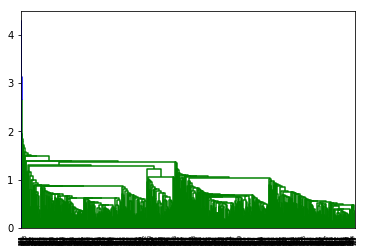

In [16]:
Z = linkage(X)
dendrogram(Z)  
plt.show()

#### <center> Checking how many samples are in each cluster

In [19]:
hier_cluster = AgglomerativeClustering(n_clusters=5).fit(X)

In [20]:
import pandas as pd
pd.Series(hier_cluster.labels_).value_counts()

1    284
2    272
3    176
0    169
4     99
dtype: int64

#### <center> Checking the statistics of each cluster

In [21]:
n_clusters = 5
X,y = make_blobs(n_features=5, n_samples=1000, centers=11, random_state=4, cluster_std=2)
X = X + 25
hier_cluster = AgglomerativeClustering(n_clusters=n_clusters).fit(X)

In [22]:
## get the mean value for each feature in each cluster and add to dataframe
cluster_stats = pd.DataFrame()
for i in range(n_clusters):
    cluster_stats['Cluster ' + str(i+1)] = X[hier_cluster.labels_==i].mean(axis=0)
cluster_stats.index = ['X' + str(i) for i in range(n_clusters)]
cluster_stats = cluster_stats.T
cluster_stats

,X0,X1,X2,X3,X4
Cluster 1,26.943262,27.182959,27.740502,19.426706,23.431462
Cluster 2,32.368623,22.512067,33.280059,31.920370,23.694175
Cluster 3,20.397201,30.116388,18.027026,25.125168,24.964740
Cluster 4,26.850060,14.997614,22.741334,16.146570,34.363074
Cluster 5,23.790265,33.995059,30.807453,32.528252,18.518295


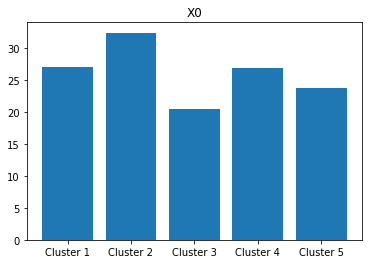

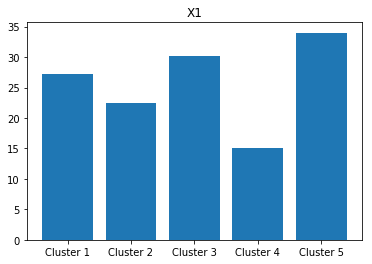

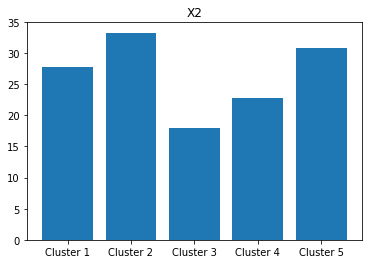

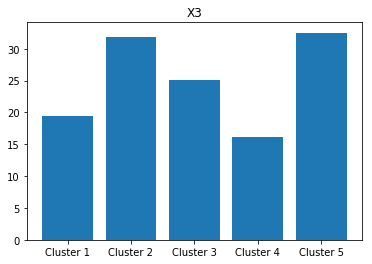

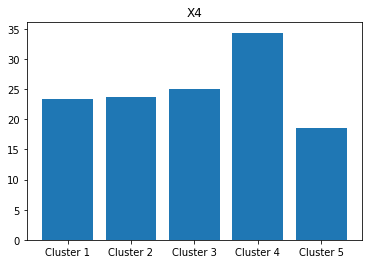

In [23]:
for i in cluster_stats.columns:
    plt.bar(cluster_stats.index, cluster_stats[i])
    plt.title(i)
    plt.show()

# <center> Activity

Using customer data in <i>Mall_Customers.csv</i>, perform market segmentation with both K-Means and Hierarchical Clustering, choosing the best number of clusters for each method.

Use statistics of each cluster to summarize the differences between the customer segments.

In which segment would you put a customer who is a male that makes $75,000 a year, is 34 years old, and has a spending score of 75?

In [75]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [76]:
df['Gender'] = df.Gender.astype('category')

In [77]:
df['Gender'] = df.Gender.cat.codes

In [78]:
df.drop(['CustomerID'], axis=1, inplace = True)

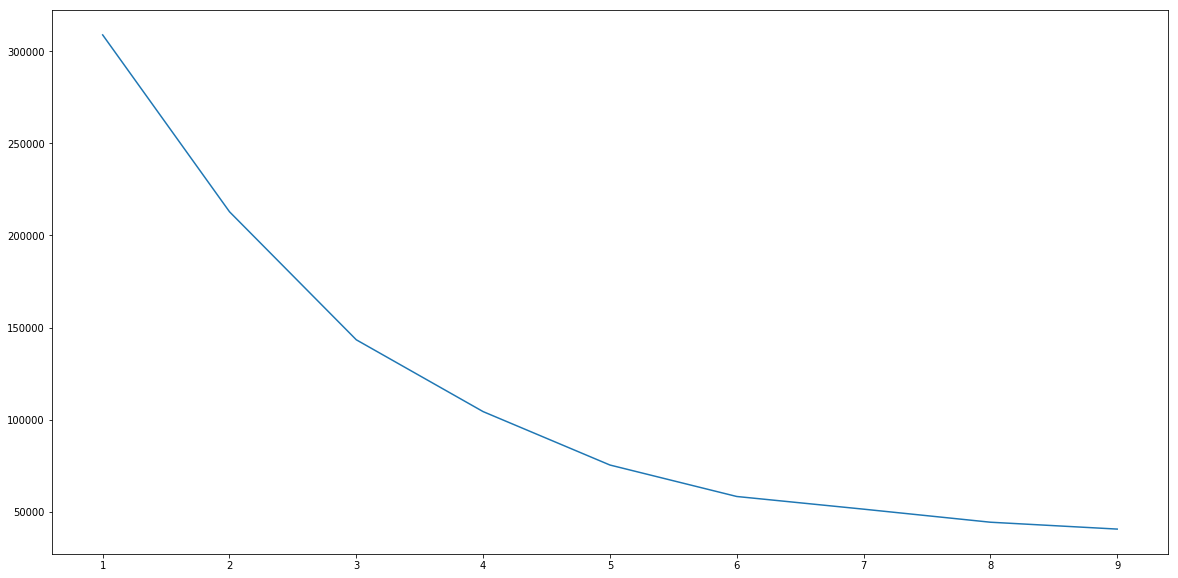

In [79]:
from sklearn.cluster import KMeans
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,10)], [KMeans(n_clusters=k).fit(df).inertia_ for k in range(1,10)])

In [80]:
k_cluster = KMeans(n_clusters=6).fit(df)

cluster_stats = pd.DataFrame()
for i in range(6):
    cluster_stats['Cluster ' + str(i+1)] = df[k_cluster.labels_==i].mean(axis=0)
cluster_stats.index = df.columns
cluster_stats = cluster_stats.T
cluster_stats

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster 1,0.461538,32.692308,86.538462,82.128205
Cluster 2,0.380952,44.142857,25.142857,19.523810
Cluster 3,0.571429,41.685714,88.228571,17.285714
Cluster 4,0.444444,56.155556,53.377778,49.088889
Cluster 5,0.409091,25.272727,25.727273,79.363636
Cluster 6,0.342105,27.000000,56.657895,49.131579


In [103]:
import numpy as np
new_cust = np.array([1, 34, 75, 75]).reshape(1,-1)
k_cluster.predict(new_cust)

array([0], dtype=int32)

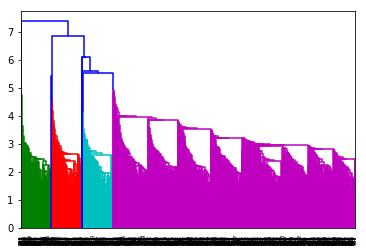

In [104]:
from sklearn.cluster import AgglomerativeClustering
hier_cluster = AgglomerativeClustering().fit(df)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)
plt.show()

In [99]:
hier_cluster = AgglomerativeClustering(n_clusters = 6).fit(df)
import pandas as pd
pd.Series(hier_cluster.labels_).value_counts()

1    51
2    39
0    35
5    32
4    23
3    20
dtype: int64

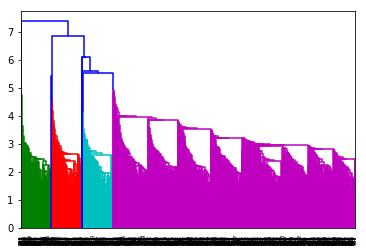

In [105]:
from sklearn.cluster import AgglomerativeClustering
hier_cluster = AgglomerativeClustering(n_clusters = 6).fit(df)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrogram(Z)  
plt.show()

In [101]:
hier_cluster = AgglomerativeClustering(n_clusters = 6).fit(df)
cluster_stats1 = pd.DataFrame()
for i in range(6):
    cluster_stats1['Cluster ' + str(i+1)] = df[hier_cluster.labels_==i].mean(axis=0)
cluster_stats1.index = df.columns
cluster_stats1 = cluster_stats1.T
cluster_stats1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster 1,0.571429,41.685714,88.228571,17.285714
Cluster 2,0.411765,53.215686,55.117647,49.470588
Cluster 3,0.461538,32.692308,86.538462,82.128205
Cluster 4,0.400000,24.850000,24.950000,81.000000
Cluster 5,0.391304,45.217391,26.304348,20.913043
Cluster 6,0.375000,24.531250,54.187500,50.250000
